In [1]:
# Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# ML imports
from sklearn.preprocessing import normalize

In [2]:
# Load Application Dataset
app_dataset = pd.read_csv("googleplaystore.csv")

In [3]:
# Explore the App Dataset
print("Shape of dataset: ")
print(app_dataset.shape)
app_dataset.sample(n = 8)

Shape of dataset: 
(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3762,BeyondPod Podcast Manager,NEWS_AND_MAGAZINES,3.9,32121,Varies with device,"1,000,000+",Free,0,Everyone,News & Magazines,"April 13, 2018",Varies with device,Varies with device
3836,Gps Route Finder,MAPS_AND_NAVIGATION,4.4,652,3.4M,"100,000+",Free,0,Everyone,Maps & Navigation,"May 26, 2018",116,4.1 and up
1074,Credit Karma,FINANCE,4.7,706301,Varies with device,"10,000,000+",Free,0,Everyone,Finance,"July 31, 2018",Varies with device,Varies with device
2876,"Phogy, 3D Camera",PHOTOGRAPHY,4.0,35724,9.9M,"1,000,000+",Free,0,Everyone,Photography,"February 11, 2015",1.40,4.0 and up
3432,Tropical Beach Live Wallpaper,PERSONALIZATION,4.0,11343,8.4M,"1,000,000+",Free,0,Everyone,Personalization,"May 22, 2018",18.0,4.1 and up
4074,Firefox Browser fast & private,COMMUNICATION,4.4,3075096,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 10, 2018",Varies with device,Varies with device
580,Black White Interracial Dating - Interracial M...,DATING,4.1,537,28M,"100,000+",Free,0,Mature 17+,Dating,"March 29, 2018",2.0.0,4.1 and up
2564,Web Browser & Fast Explorer,SOCIAL,4.4,54768,2.6M,"5,000,000+",Free,0,Everyone,Social,"May 16, 2018",3.6.1,4.0.3 and up


In [4]:
app_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Lots of samples where there aren't any ratings

In [6]:
print("Number of distinct categories: " + str(app_dataset['Category'].nunique()))
print()

# The categories and their counts
app_dataset['Category'].value_counts()

Number of distinct categories: 34



FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [7]:
# Drop the invalid row
app_dataset = app_dataset.drop(app_dataset.loc[app_dataset['Category'] == '1.9'].index)

In [9]:
# What about the genres
print("Number of distinct genres: " + str(app_dataset['Genres'].nunique()))
print()

# The top 20 genres and their counts
app_dataset['Genres'].value_counts()[:20]

Number of distinct genres: 119



Tools                842
Entertainment        623
Education            549
Medical              463
Business             460
Productivity         424
Sports               398
Personalization      392
Communication        387
Lifestyle            381
Finance              366
Action               365
Health & Fitness     341
Photography          335
Social               295
News & Magazines     283
Shopping             260
Travel & Local       257
Dating               234
Books & Reference    231
Name: Genres, dtype: int64

In [10]:
# Showing distinct number of installs
list(app_dataset['Installs'].unique())

['10,000+',
 '500,000+',
 '5,000,000+',
 '50,000,000+',
 '100,000+',
 '50,000+',
 '1,000,000+',
 '10,000,000+',
 '5,000+',
 '100,000,000+',
 '1,000,000,000+',
 '1,000+',
 '500,000,000+',
 '50+',
 '100+',
 '500+',
 '10+',
 '1+',
 '5+',
 '0+',
 '0']

In [11]:
# Cleaning it up, round down the number of installs
installs = app_dataset['Installs']
copy = []
for i in installs:
    if i == 'Free':
        copy.append(0)
        continue
    i = i.replace(",", "")
    if '+' in i:
        copy.append(int(i[:-1]))
    else:
        copy.append(int(i))
app_dataset['Installs'] = copy

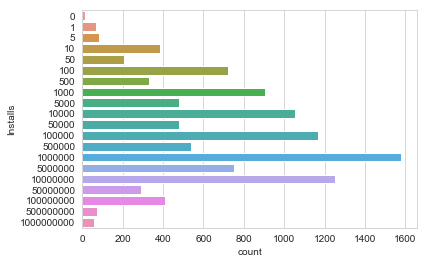

In [12]:
# Plot graph of distribution of number of installs
sns.countplot(y='Installs', data=app_dataset)

The most number of downloads are over between 1,000,000 and 5,000,000

In [13]:
# Edit the invalid row
app_dataset['Type'].replace(0, 'Free', inplace=True)

# Free vs Paid
app_dataset['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

There're substantially more free apps than paid apps.
Do free apps get better ratings?

In [14]:
# Dataset with no NaN ratings
app_dataset = app_dataset[app_dataset['Rating'].notnull()]

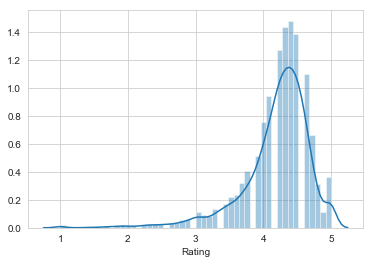

In [15]:
sns.distplot(app_dataset['Rating'])

(array([  56.,  231., 1711., 7368.]),
 array([1, 2, 3, 4, 5]),
 <a list of 4 Patch objects>)

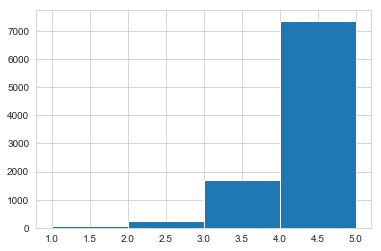

In [16]:
plt.hist(app_dataset['Rating'], bins=[1,2,3,4,5])

Most apps have rating hovering between 4 and 5
Which app category has the highest rating?
Do higher rating lead to higher installs?

In [77]:
categories = list(app_dataset['Category'].unique())
cat_counts = []
for i in categories:
    cat_counts.append(app_dataset['Category'].value_counts()[i])

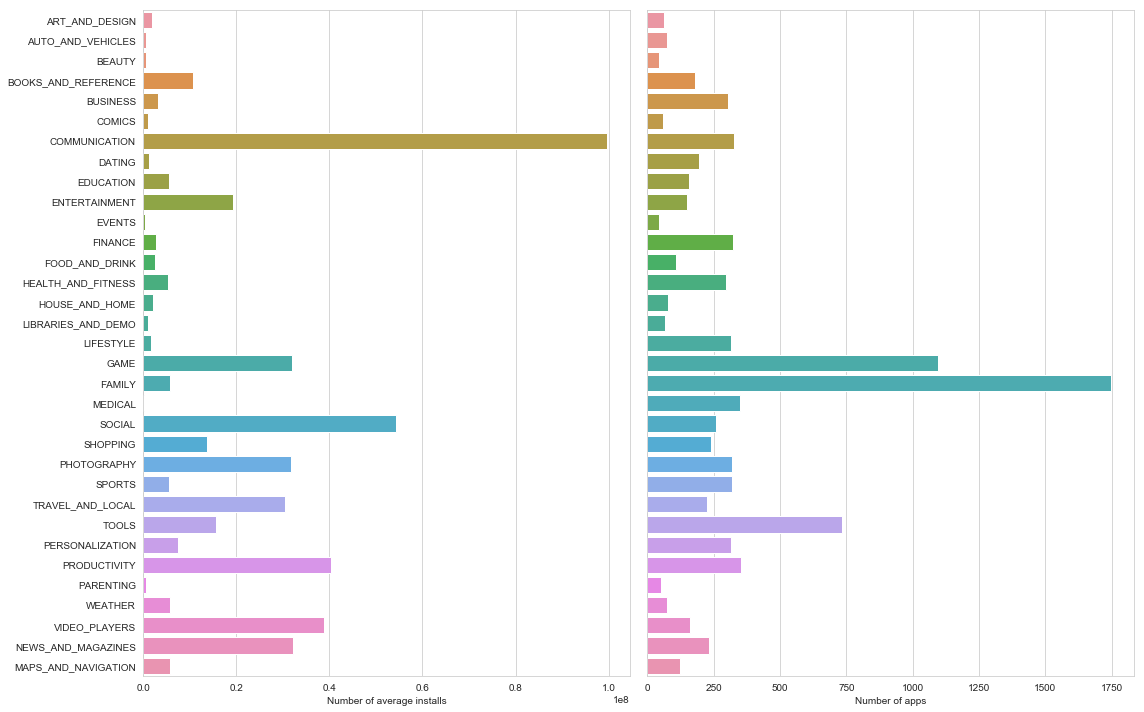

In [75]:
avg_installs = [app_dataset[app_dataset['Category'] == x]['Installs'].mean() for x in categories]

# Plot categories and their counts
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 10)
sns.barplot(y=categories, x=avg_installs, ax=ax[0])
ax[0].set(xlabel='Number of average installs')
sns.barplot(y=categories, x=cat_counts, ax=ax[1])
ax[1].set(yticks = [], ylabel='', xlabel='Number of apps')
plt.tight_layout()

As seen from the graph, apps in Communication category has the highest average number of installs. This might be due to the scraped data include only the top apps in this category.
Family applications are the most common but have a very low average number of installs. This might be due to a lot of these apps have few installs bringing the average down. Let's try with the mode.

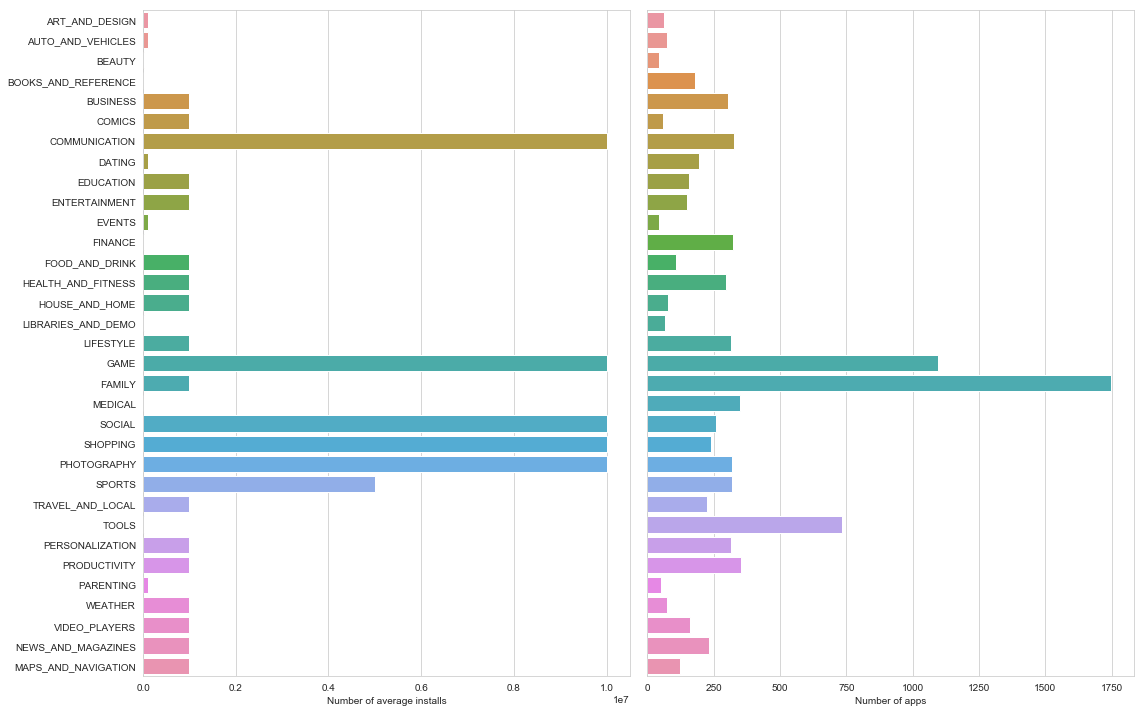

In [83]:
mode_installs = [app_dataset[app_dataset['Category'] == x]['Installs'].mode()[0] for x in categories]
# Plot categories and their counts, mode average number of installs
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 10)
sns.barplot(y=categories, x=mode_installs, ax=ax[0])
ax[0].set(xlabel='Number of mode installs')
sns.barplot(y=categories, x=cat_counts, ax=ax[1])
ax[1].set(yticks = [], ylabel='', xlabel='Number of apps')
plt.tight_layout()

Game, Social, Communication, Shopping, Photography category tend to have fewer applications with low number of installs.
Let's look closer at the communication category.

In [98]:
app_dataset[app_dataset['Category'] == 'COMMUNICATION'].sort_values(by='Installs', ascending=False).loc[:, ['App', 'Installs']][:20]

,App,Installs
335,Messenger – Text and Video Chat for Free,1000000000
411,Google Chrome: Fast & Secure,1000000000
386,Hangouts,1000000000
381,WhatsApp Messenger,1000000000
4234,Skype - free IM & video calls,1000000000
468,Skype - free IM & video calls,1000000000
3904,WhatsApp Messenger,1000000000
3996,Google Chrome: Fast & Secure,1000000000
336,WhatsApp Messenger,1000000000
464,Hangouts,1000000000


A lot of these apps are duplicates. Let's try another category

In [100]:
app_dataset[app_dataset['Category'] == 'GAME'].sort_values(by='Installs', ascending=False).loc[:, ['App', 'Installs']][:20]

,App,Installs
1750,Subway Surfers,1000000000
1917,Subway Surfers,1000000000
3896,Subway Surfers,1000000000
1872,Subway Surfers,1000000000
1654,Subway Surfers,1000000000
1700,Subway Surfers,1000000000
1842,Candy Crush Saga,500000000
1705,Candy Crush Saga,500000000
1751,Candy Crush Saga,500000000
1886,Temple Run 2,500000000


Again, a lot of these apps have duplicate entries. The dataset is not very reliable.

In [17]:
categories_rating_mean = [app_dataset[app_dataset['Category'] == x]['Rating'].mean() for x in categories]
categories_rating_mode = [app_dataset[app_dataset['Category'] == x]['Rating'].mode()[0] for x in categories]

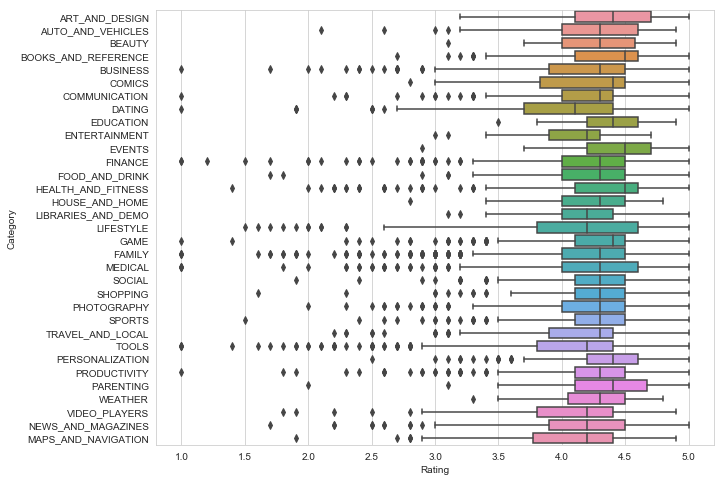

In [36]:
# Box and whisker plos of categories vs their ratings
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.boxplot(y='Category', x='Rating', data=app_dataset)

The plot show that the median rating is similar across categories. 
Some categories have very wide spread such as the 'Lifestyle' and 'Dating' category.
Categories tend to have lots of outliers except for a few such as 'Art and Design', 'Weather'

In [19]:
# Which genre of games tend to have the highest rating?
game_dataset = app_dataset[app_dataset['Category'] == 'GAME']

# Genres of games
values = game_dataset['Genres'].value_counts()

In [20]:
# Modifying the 8 last genres to become singular genre only
for i in range(-8,0):
    s = ''
    for j in values.index[i]:
        if j == ';':
            break
        s += j
    game_dataset.replace(values.index[i], s, inplace=True)

game_dataset['Genres'].value_counts()

C:\Users\BUI\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


Action          361
Arcade          207
Racing           93
Adventure        78
Casual           49
Card             45
Puzzle           42
Board            41
Casino           37
Word             28
Trivia           28
Strategy         24
Music            21
Role Playing     16
Sports           14
Simulation       13
Name: Genres, dtype: int64

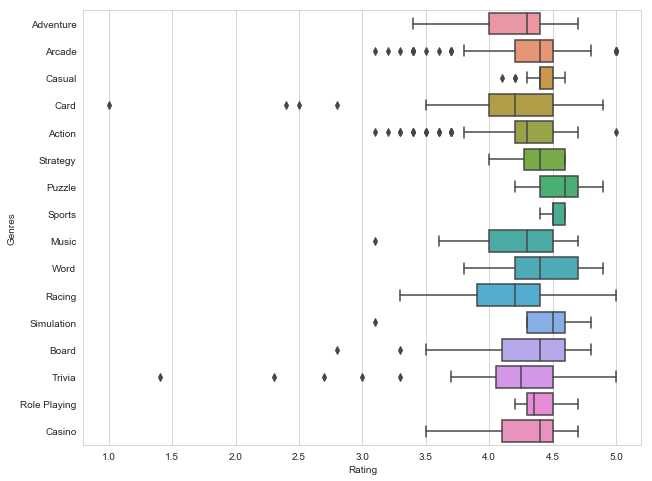

In [21]:
# Box and whisker plos of game genres vs their ratings
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.boxplot(y='Genres', x='Rating', data=game_dataset)

The median ratings for different genres are similar with puzzle games being the highest. 
Racing games have the widest range in rating score while sport games being the lowest (this might be due to the low number fo samples)

In [23]:
genres_counts = game_dataset['Genres'].value_counts()
genres_counts

Action          361
Arcade          207
Racing           93
Adventure        78
Casual           49
Card             45
Puzzle           42
Board            41
Casino           37
Word             28
Trivia           28
Strategy         24
Music            21
Role Playing     16
Sports           14
Simulation       13
Name: Genres, dtype: int64

['Adventure' 'Arcade' 'Casual' 'Card' 'Action' 'Strategy' 'Puzzle'
 'Sports' 'Music' 'Word' 'Racing' 'Simulation' 'Board' 'Trivia'
 'Role Playing' 'Casino']


[Text(0.5,0,'Average number of installs')]

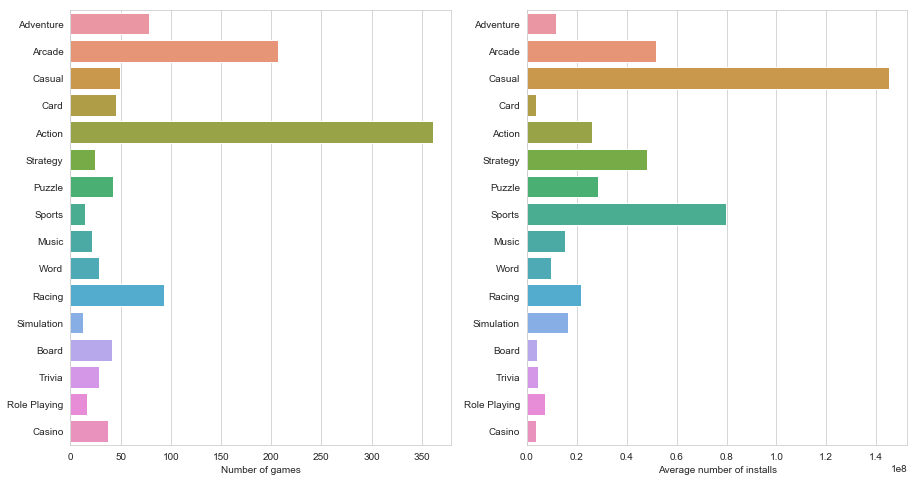

In [72]:
game_genres = game_dataset['Genres'].unique()
genres_avg_installs = [game_dataset[game_dataset['Genres'] == x]['Installs'].mean() for x in game_genres]
genres_counts = []
for i in game_genres:
    genres_counts.append(game_dataset['Genres'].value_counts()[i])

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 8)

sns.barplot(x=genres_counts, y=game_genres, ax=ax[0])
ax[0].set(xlabel='Number of games')
sns.barplot(x=genres_avg_installs, y=game_genres, ax=ax[1])
ax[1].set(xlabel='Average number of installs')

As seen from the graphs, Action genre has the most amount of games. However, these game tend to not have a lower number of average installs compare to other genres.
From the dataset, there are only 49 casual games but they have the highest number of average installs.
Sport games have the second highest average installs but are the second lowest in game counts.
Although the sample size is too small to make any conclusions.